<a href="https://colab.research.google.com/github/Vidhya-Shekeena/AI-Agent-Mental-Health-Risk-Detection-Using-Survey-Data/blob/main/AI_Agent_Mental_Health_Risk_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AI Agent: Mental Health Risk Detection using Survey Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the real survey dataset
file_path = "/content/survey.csv"
df = pd.read_csv(file_path)

# Drop irrelevant or sparse columns
df.drop(['Timestamp', 'state', 'comments'], axis=1, inplace=True)

# Fill missing values
for col in ['self_employed', 'work_interfere']:
    df[col].fillna('Unknown', inplace=True)

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Define features and target
X = df.drop('treatment', axis=1)
y = df['treatment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model and encoders
joblib.dump(model, "mental_health_model.pkl")
joblib.dump(scaler, "mental_scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Function to predict and recommend
def predict_from_user_input(user_data):
    df_user = pd.DataFrame([user_data])

    # Encode using saved encoders
    for col in df_user.columns:
        if col in label_encoders:
            df_user[col] = label_encoders[col].transform(df_user[col])

    df_user_scaled = scaler.transform(df_user)
    prediction = model.predict(df_user_scaled)[0]

    print(f"Predicted Need for Mental Health Treatment: {'Yes' if prediction else 'No'}")
    if prediction == 1:
        print("Recommendations: Consider speaking to a professional, reduce work stress, join wellness programs, and engage in open conversations.")
    else:
        print("You appear to be managing well. Keep up your healthy mental habits!")




<ipython-input-1-a449204d214b>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       129
           1       0.80      0.88      0.84       123

    accuracy                           0.83       252
   macro avg       0.84      0.83      0.83       252
weighted avg       0.84      0.83      0.83       252

Confusion Matrix:
 [[102  27]
 [ 15 108]]


In [6]:
import joblib
import pandas as pd

# Load the model, scaler, and encoders
model = joblib.load("mental_health_model.pkl")
scaler = joblib.load("mental_scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

# Feature list and selectable options (excluding Age)
feature_options = {
    'Gender': ['Male', 'Female', 'Other'],
    'Country': ['United States', 'India', 'United Kingdom', 'Canada', 'Germany', 'Other'],
    'self_employed': ['Yes', 'No', 'Unknown'],
    'family_history': ['Yes', 'No'],
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often', 'Unknown'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    'remote_work': ['Yes', 'No'],
    'tech_company': ['Yes', 'No'],
    'benefits': ['Yes', 'No', "Don't know"],
    'care_options': ['Yes', 'No', 'Not sure'],
    'wellness_program': ['Yes', 'No', "Don't know"],
    'seek_help': ['Yes', 'No', "Don't know"],
    'anonymity': ['Yes', 'No', "Don't know"],
    'leave': ['Very easy', 'Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult'],
    'mental_health_consequence': ['Yes', 'No', 'Maybe'],
    'phys_health_consequence': ['Yes', 'No', 'Maybe'],
    'coworkers': ['Yes', 'No', 'Some of them'],
    'supervisor': ['Yes', 'No', 'Some of them'],
    'mental_health_interview': ['Yes', 'No', 'Maybe'],
    'phys_health_interview': ['Yes', 'No', 'Maybe'],
    'mental_vs_physical': ['Yes', 'No', "Don't know"],
    'obs_consequence': ['Yes', 'No']
}

# Order of features
feature_order = ['Age'] + list(feature_options.keys())

# Function to get user input with choices
def get_user_input():
    user_data = {}

    # Numeric input
    age = input("Enter your age: ")
    while not age.isdigit() or not (10 <= int(age) <= 100):
        age = input("Enter a valid age between 10 and 100: ")
    user_data['Age'] = int(age)

    # Categorical options
    for feature, options in feature_options.items():
        print(f"\n{feature}:")
        for i, opt in enumerate(options):
            print(f"  {i + 1}. {opt}")
        choice = input("Choose an option (number): ")
        while not choice.isdigit() or not (1 <= int(choice) <= len(options)):
            choice = input("Invalid choice. Please enter a valid number: ")
        user_data[feature] = options[int(choice) - 1]

    return user_data

# Prediction function
def predict_user_input():
    user_input = get_user_input()
    df_user = pd.DataFrame([user_input])

    # Encode categorical features
    for col in df_user.columns:
        if col in label_encoders:
            try:
                df_user[col] = label_encoders[col].transform(df_user[col])
            except ValueError:
                print(f"❌ Invalid value for {col}. Try one of: {list(label_encoders[col].classes_)}")
                return

    # Scale and predict
    df_scaled = scaler.transform(df_user)
    prediction = model.predict(df_scaled)[0]

    # Output
    print("\n🔎 Prediction: Mental Health Treatment Needed?" + (" ✅ Yes" if prediction == 1 else " ❌ No"))
    if prediction == 1:
        print("💡 Suggestion: Consider professional help, reduce stress, talk with a counselor or join wellness programs.")
    else:
        print("✅ You're at low risk. Keep up your healthy habits!")

# Run it
predict_user_input()


Enter your age: 21

Gender:
  1. Male
  2. Female
  3. Other
Choose an option (number): 1

Country:
  1. United States
  2. India
  3. United Kingdom
  4. Canada
  5. Germany
  6. Other
Choose an option (number): 1

self_employed:
  1. Yes
  2. No
  3. Unknown
Choose an option (number): 1

family_history:
  1. Yes
  2. No
Choose an option (number): 1

work_interfere:
  1. Never
  2. Rarely
  3. Sometimes
  4. Often
  5. Unknown
Choose an option (number): 1

no_employees:
  1. 1-5
  2. 6-25
  3. 26-100
  4. 100-500
  5. 500-1000
  6. More than 1000
Choose an option (number): 1

remote_work:
  1. Yes
  2. No
Choose an option (number): 
Invalid choice. Please enter a valid number: 1

tech_company:
  1. Yes
  2. No
Choose an option (number): 1

benefits:
  1. Yes
  2. No
  3. Don't know
Choose an option (number): 1

care_options:
  1. Yes
  2. No
  3. Not sure
Choose an option (number): 1

wellness_program:
  1. Yes
  2. No
  3. Don't know
Choose an option (number): 1

seek_help:
  1. Yes


Accuracy: 0.8333
Precision: 0.8000
Recall: 0.8780
F1-score: 0.8372

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       129
           1       0.80      0.88      0.84       123

    accuracy                           0.83       252
   macro avg       0.84      0.83      0.83       252
weighted avg       0.84      0.83      0.83       252



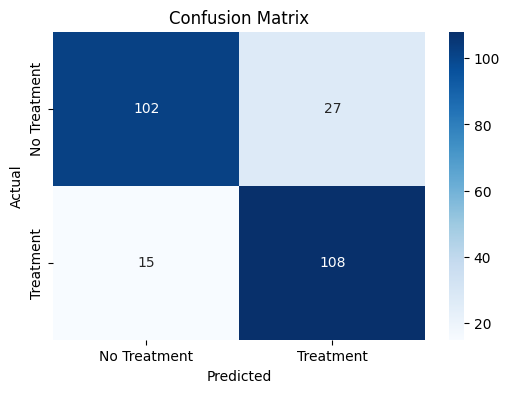

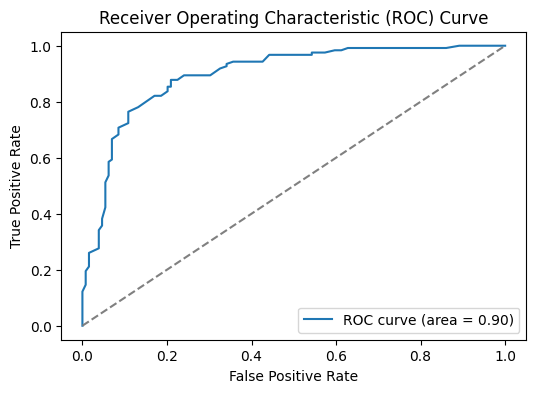

AUC Score: 0.8962


<ipython-input-9-d1af696d6d94>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


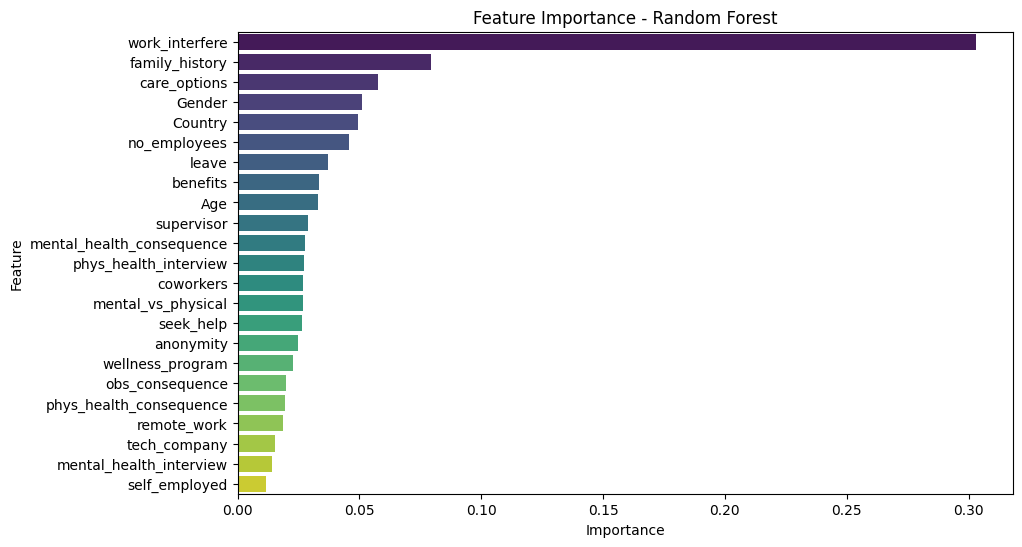

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

# Assuming y_test and y_pred already exist from your model prediction

# 1. Accuracy, Precision, Recall, F1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

# 2. Classification report (already printed in your code, but for completeness)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment','Treatment'], yticklabels=['No Treatment','Treatment'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. ROC Curve & AUC Score
# Get prediction probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc_score:.4f}")

# 5. Feature Importance Plot
feature_names = X.columns
importances = model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
